<a href="https://colab.research.google.com/github/mueller14003/PH150/blob/main/Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Physics 150 
# Lab #4 - Falling Objects with Air Resistance

**Group 4:**
* Kyle Mueller
* Sam Fataua
* Makenzy Pharis

The drag force acting on a falling object is given by:

$$F_D{}=\frac{1}{2}C\rho{}Av^2{}$$

where 

C is the drag coefficient and has the following values:
* 0.48 for a sphere
* 0.82 for a cylinder
* 1.1 for a cone

$\rho$ is the air density. At Rexburg's altitude, it is equal to 1.02 kg/m³.

A is the cross-sectional area.

v is the velocity of the object.

![Free-body Diagram](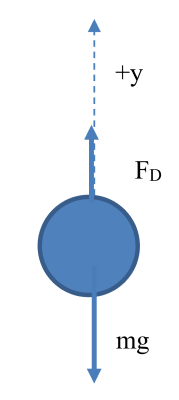
)

Applying Newton's second law to the free-body diagram shown above gives:

$$\Sigma{}F_y{}=-mg+F_D{}=ma_y{}$$

Solving for the acceleration in the y-direction gives:

$$a_y{}=\frac{C\rho{}Av^2}{2m}-g$$

Euler’s equations can be used to determine the velocity and height of the object as a function of time. These are given by:

$$y_{n+1}=y_n{}+v_n{}\times{}\Delta{}t$$

$$v_{n+1}=v_n{}+a_n{}\times{}\Delta{}t$$

## **Activity 1** - Minimum Time

Determine the time required for a ball to fall 17.4 m, starting from rest, with no air resistance.

$s=\frac{1}{2}gt^2$

$t^2{}=\frac{2s}{g}$

$t = \sqrt{\frac{2s}{g}}$

In [ ]:
g = 9.80665
s = 17.4
t = ((2*s)/g)**0.5
print(f"Time required for a ball to fall {s} m: {t:0.4f} s")

Time required for a ball to fall 17.4 m: 1.8838 s


## **Activity 2** - Model for 1-Dimensional Motion

Using equations (3-5) above, construct a model for the motion of a falling object.


In [ ]:
# Import libraries
from math import pi

# Constants
g = 9.80665 #m/s²
ρ = 1.02 #kg/m³
C_vals = {"sphere":0.48,
          "cylinder":0.82,
          "cone":1.1}
dt = 0.1

# Functions
area = lambda r: pi*r**2

# Initial Conditions are included in the function's parameters
def predict_time(obj_type,r,m,v=0,t=0,y=17.4):
  C = C_vals.get(obj_type)
  A = area(r)
  while y>0:
    a = ((0.5*C*ρ*A*v**2)/m)-g
    y+=v*dt
    v+=a*dt
    t+=dt
  return t

## **Activity 3** - Predicting Times

Make mass and diameter measurements on each of the objects. Then determine predicted drop times for each of the six objects dropped from a height of 16.92 m using the Python code developed in Activity II. In the lab room, run some tests to verify the accuracy of your model. Give your times to the instructor or TA. 

In [ ]:
from IPython.display import Markdown

In [ ]:
ppb = predict_time("sphere",0.019,0.0017)
pc = predict_time("cylinder",0.04,0.0052)
sc = predict_time("cone",0.05,0.0256)
sbs = predict_time("sphere",0.0255,0.0023)
sbl = predict_time("sphere",0.074,0.051)
bb = predict_time("sphere",0.1615,0.0801)

In [ ]:
Markdown(
 "| Object                 | Predicted Times (s) |\n" \
 "|:-----------------------|--------------------:|\n" \
f"| Ping pong ball         |          {ppb:0.1f} |\n" \
f"| Plastic cup            |           {pc:0.1f} |\n" \
f"| Styrofoam cone         |           {sc:0.1f} |\n" \
f"| Styrofoam ball (small) |          {sbs:0.1f} |\n" \
f"| Styrofoam ball (large) |          {sbl:0.1f} |\n" \
f"| Beach ball             |           {bb:0.1f} |\n")

| Object                 | Predicted Times (s) |
|:-----------------------|--------------------:|
| Ping pong ball         |          2.9 |
| Plastic cup            |           4.0 |
| Styrofoam cone         |           2.9 |
| Styrofoam ball (small) |          3.1 |
| Styrofoam ball (large) |          2.4 |
| Beach ball             |           3.3 |


## **Activity 4** - Comparison of Predicted and Measured Times

Each group will measure the time of flight for the six objects. Average the time measurements for each object and compare to your predicted values. 

The % Difference is given by:

$$\%Diff=\frac{Measured-Predicted}{Measured}\times{}100\%$$

In [ ]:
p_diff = lambda m,p:((m-p)/m)*100

In [ ]:
a_ppb = 3.10
a_pc = 4.07
a_sc = 2.73
a_sbs = 2.82
a_sbl = 2.00
a_bb = 2.86

In [ ]:
Markdown(
 "| Object                 | Predicted Times (s) | Actual Time (s) |                  % Error |\n" \
 "|:-----------------------|--------------------:|----------------:|-------------------------:|\n" \
f"| Ping pong ball         |          {ppb:0.1f} |         {a_ppb} | {p_diff(a_ppb,ppb):0.1f} |\n" \
f"| Plastic cup            |           {pc:0.1f} |          {a_pc} |   {p_diff(a_pc,pc):0.1f} |\n" \
f"| Styrofoam cone         |           {sc:0.1f} |          {a_sc} |   {p_diff(a_sc,sc):0.1f} |\n" \
f"| Styrofoam ball (small) |          {sbs:0.1f} |         {a_sbs} | {p_diff(a_sbs,sbs):0.1f} |\n" \
f"| Styrofoam ball (large) |          {sbl:0.1f} |         {a_sbl} | {p_diff(a_sbl,sbl):0.1f} |\n" \
f"| Beach ball             |           {bb:0.1f} |          {a_bb} |   {p_diff(a_bb,bb):0.1f} |\n")

| Object                 | Predicted Times (s) | Actual Time (s) |                  % Error |
|:-----------------------|--------------------:|----------------:|-------------------------:|
| Ping pong ball         |          2.9 |         3.1 | 6.5 |
| Plastic cup            |           4.0 |          4.07 |   1.7 |
| Styrofoam cone         |           2.9 |          2.73 |   -6.2 |
| Styrofoam ball (small) |          3.1 |         2.82 | -9.9 |
| Styrofoam ball (large) |          2.4 |         2.0 | -20.0 |
| Beach ball             |           3.3 |          2.86 |   -15.4 |


Your score on the lab will be based on your % error for the six different objects.

If any of your % differences are greater than 10%, give a possible explanation for the discrepancy.

The large styrofoam ball and the beach ball had % differences greater than 10%. These discrepancies could be due to a wide array of varying factors. One of the possible factors could have been human error. Reaction times could have been affected by the loud environment. The sun was also close in the sky to the point where the objects were being dropped, which also could have had an impact on reaction time. 

Another possible explanation for the discrepancies: If our predicted results mostly align with those of our peers, there likely could have been anomalies in the experiment. There was wind when we were collecting data, and some of the objects looked as if they had started accelerating in a different direction after they had been dropped. Some objects were dropped at slightly different heights, and some objects looked like they had some amount of initial velocity that was not accounted for. These are all factors that could have resulted in the discrepancies between our predicted data and the actual data.